In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import scipy.interpolate as inter
import plotly.express as px
from sklearn import preprocessing as skprep
import numba
import timeit
import math
import itertools
from pprint import pprint
from mnk import MNK

In [30]:
df = pd.read_csv("DataSet3_1.csv", sep=',')
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df = df[~(df["Power (kW)"] == 0)]
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34915 entries, 0 to 34914
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Timestamp   34915 non-null  datetime64[ns]
 1   OAT (F)     34915 non-null  int64         
 2   Power (kW)  34915 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 818.4 KB


In [53]:
new_df = df.sample(34915)
new_df = new_df.drop_duplicates(subset=['Power (kW)'])
new_df

,Timestamp,OAT (F),Power (kW)
1608,2010-01-17 19:15:00,54,306.9
8237,2010-03-27 23:15:00,56,195.2
23717,2010-09-05 05:15:00,56,197.1
2860,2010-01-30 20:15:00,51,293.1
7277,2010-03-17 23:15:00,54,222.1
...,...,...,...
8986,2010-04-04 18:30:00,51,101.8
8988,2010-04-04 19:00:00,51,96.9
18855,2010-07-16 13:45:00,75,402.4
4603,2010-02-18 02:45:00,52,120.6


In [54]:
len(new_df), new_df["Power (kW)"].nunique()

(2773, 2773)

In [55]:
funcs = [
    lambda x: x**0,
    lambda x: x,
    lambda x: x**2
]

mnk = MNK(new_df["Power (kW)"], new_df["OAT (F)"], funcs)

In [56]:
mnk.c

array([ 5.93427591e+01, -1.11474767e-01,  3.93795716e-04])

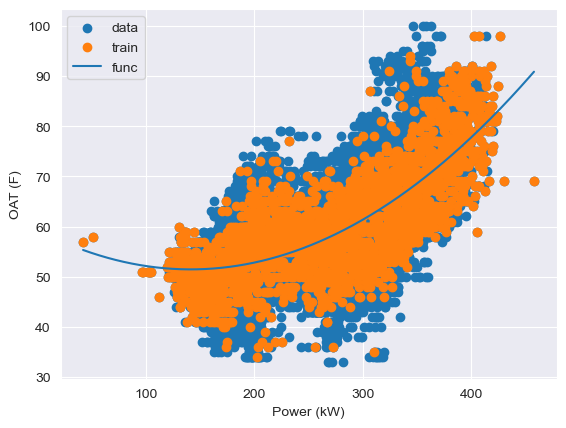

In [57]:
plt.scatter(df["Power (kW)"], df["OAT (F)"], label="data")
plt.scatter(new_df["Power (kW)"], new_df["OAT (F)"], label="train")
new_x = np.linspace(df["Power (kW)"].min(),df["Power (kW)"].max(), num=500, endpoint=True)
plt.xlabel("Power (kW)")
plt.ylabel("OAT (F)")
plt.plot(new_x, mnk(new_x), label="func")
plt.legend()